# IMPORT LIBRARY

In [1]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

# Membaca File CSV

In [2]:
#Membaca dan Melihat Dataset

dataset = pd.read_csv("covid_19_india.csv")
dataset.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# DATA SPLIT

In [3]:
# Membagi data menjadi x dan y

x = dataset.drop(['Sno','Date','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational'], axis=1)
y = dataset[["ConfirmedForeignNational"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x.head()

,Cured,Deaths,Confirmed
0,0,0,1
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,3


# ALGORITMA DECISION TREE

In [4]:
# Menggunakan Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [5]:
# klasifikasi report

dt_pred = dt.predict(x_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           -       0.99      0.98      0.99      5306
           0       0.50      0.77      0.61        88
           1       0.36      0.56      0.43         9
          10       0.33      0.50      0.40         2
          11       0.00      0.00      0.00         2
          14       0.70      0.78      0.74         9
           2       0.67      0.33      0.44        12
           3       0.20      0.50      0.29         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.98      5433
   macro avg       0.40      0.45      0.41      5433
weighted avg       0.98      0.98      0.98      5433



C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [6]:
# Akurasi dari Algoritma Decision Tree

acc_dt = accuracy_score(y_test, dt_pred)
print("Akurasi algoritma Decision Tree :", round(acc_dt,3))

Akurasi algoritma Decision Tree : 0.978


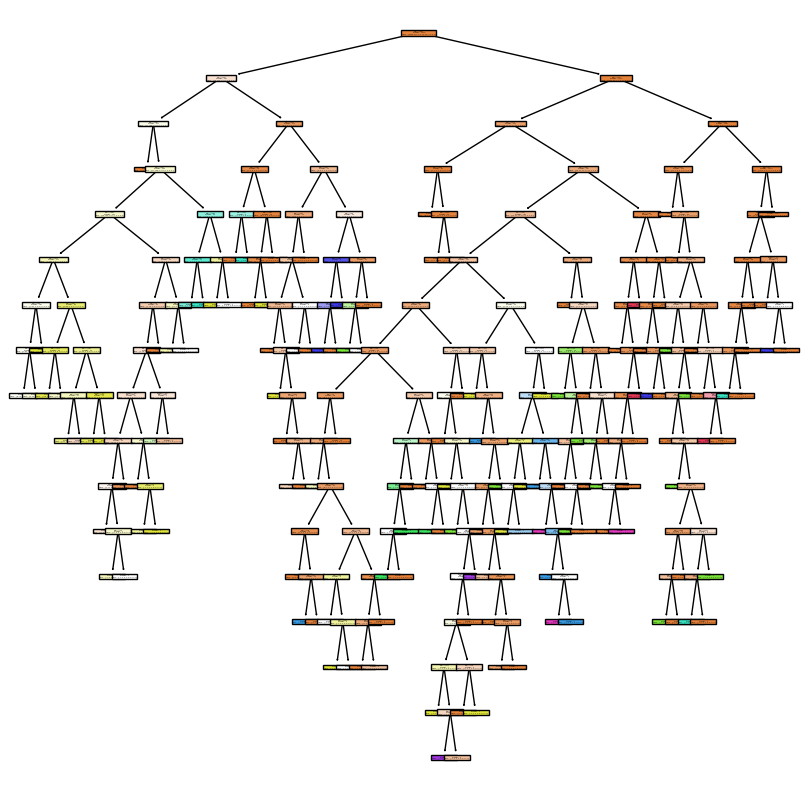

In [7]:
# Ploting Decision Tree

from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=x.columns,filled=True)
plt.show()

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


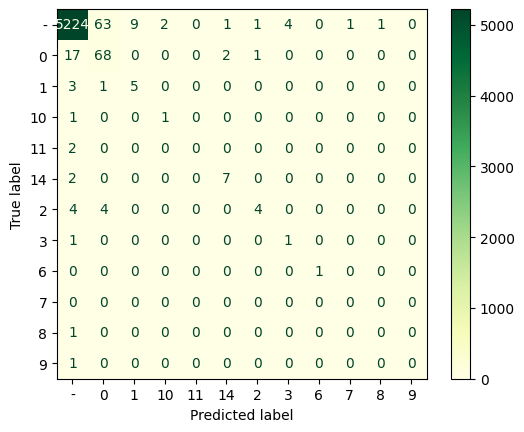

In [8]:
# Ploting confusion matrix dari Decision Tree

plot_confusion_matrix(dt, x_test, y_test, cmap="YlGn")

# ALGORITMA SUPORT VECTOR MACHINE (SVM)

In [9]:
from sklearn.svm import SVC

#Latih model dari SVM Classifier
svm = SVC()
svm.fit(x_train,y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [10]:
# klasifikasi report

svm_pred = svm.predict(x_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           -       0.98      1.00      0.99      5306
           0       0.00      0.00      0.00        88
           1       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.98      5433
   macro avg       0.09      0.09      0.09      5433
weighted avg       0.95      0.98      0.97      5433



C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
# Akurasi algoritma SVM

acc_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVM :", round(acc_svm,2))

Akurasi algoritma SVM : 0.98


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


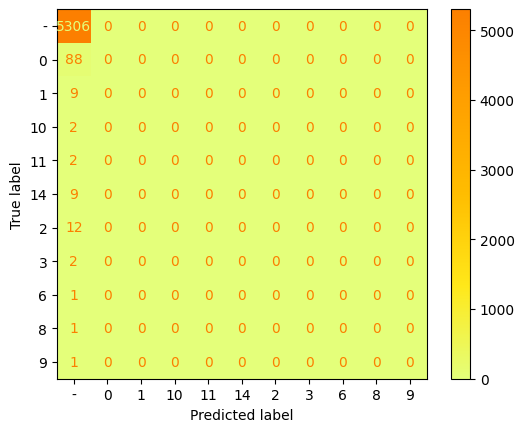

In [12]:
# Ploting confusion matrix dari SVM

plot_confusion_matrix(svm, x_test, y_test, cmap="Wistia")
plt.show()

# ALGORITMA K-NEAREST NEIGHBORS

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [14]:
# Akurasi menggunakan Algoritma KNN

acc_knn = knn.score(x_test, y_test)
print("Akurasi algoritma KNN :", round(acc_svm,2))

Akurasi algoritma KNN : 0.98


In [15]:
#Klasifikasi report

y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           -       0.99      1.00      0.99      5306
           0       0.59      0.36      0.45        88
           1       0.33      0.11      0.17         9
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          14       0.31      0.44      0.36         9
           2       0.33      0.08      0.13        12
           3       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.98      5433
   macro avg       0.23      0.18      0.19      5433
weighted avg       0.97      0.98      0.98      5433



C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


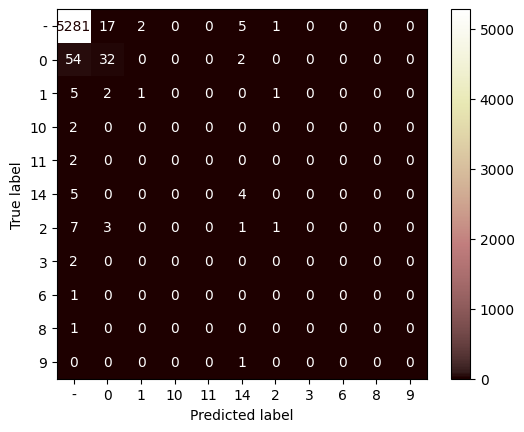

In [16]:
# Plotting data menggunakan KNN

confusion_matrix(y_test, y_pred)
plot_confusion_matrix(knn, x_test, y_test, cmap='pink')

# PERBANDINGAN AKURASI SETIAP ALGORITMA

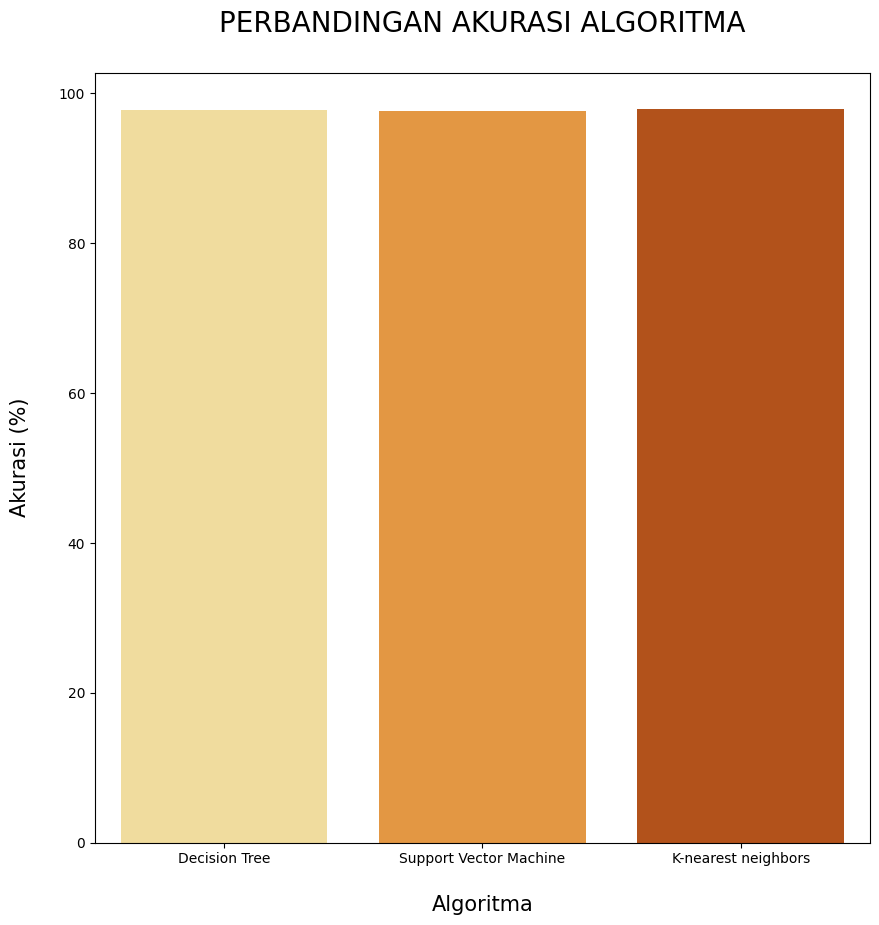

In [17]:
algoritma = ["Decision Tree","Support Vector Machine","K-nearest neighbors"]
nilaiPrediksi = [acc_dt*100,acc_svm*100,acc_knn*100]

plt.figure(figsize=(10,10))
sns.barplot(x= algoritma,y = nilaiPrediksi, palette='YlOrBr')
plt.title("PERBANDINGAN AKURASI ALGORITMA\n", fontsize=20)
plt.ylabel("Akurasi (%)\n",  fontsize=15)
plt.xlabel("\nAlgoritma",  fontsize=15)
plt.show()

# CONFUSION MATRIX

In [18]:
#Import library
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

Confusion matrix

 [[5224   63    9    2    0    1    1    4    0    1    1    0]
 [  17   68    0    0    0    2    1    0    0    0    0    0]
 [   3    1    5    0    0    0    0    0    0    0    0    0]
 [   1    0    0    1    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    7    0    0    0    0    0    0]
 [   4    4    0    0    0    0    4    0    0    0    0    0]
 [   1    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0]]


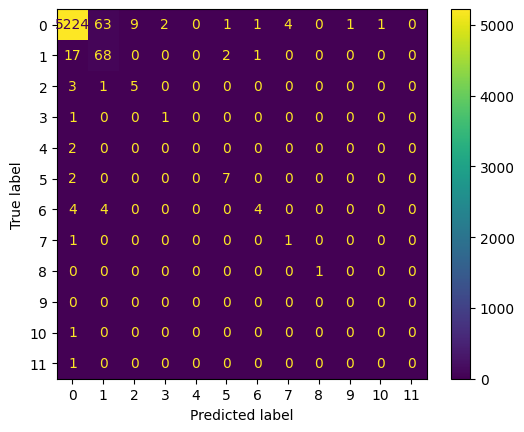

In [19]:
# Ploting confusion matrix

clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)


dt_pred = dt.predict(x_test)

dt_cm = confusion_matrix(y_test, dt_pred)
print('Confusion matrix\n\n', dt_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
disp.plot()
plt.grid(False)
plt.show()